In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv("dataset_capres_cawapres.csv")
data

,full_text,sentimen
0,ambil bansosnya pilih tetap no1,positif
1,padahal bilang bakal jadi sangka eeaaaa bener ...,negatif
2,aamiin alhamdulillah smg hasil sama hasily nnt...,positif
3,ratus personel gabung siap aman kampanye pamek...,positif
4,asal jangan,negatif
...,...,...
3229,bentuk kabinet bersih profesional,positif
3230,rakyat selalu dukung menang,positif
3231,berantas koruptor sama,positif
3232,nih ngamuk bukan pihak imin ato yth ph dan mul...,negatif


In [3]:
# melihat data yang kosong
data.isnull().sum()

full_text    0
sentimen     0
dtype: int64

In [4]:
# melihat data yang duplicate
data.duplicated().sum()

0

In [5]:
data = data.replace({'positif':1, 'negatif':0})
x = data['full_text']
y = data['sentimen']

# Ekstaksi fitur tf-idf

In [6]:
# ekstaksi fitur tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
x_tfidf = tfidf_vectorizer.fit_transform(x)

# membagi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(x_tfidf, y, test_size=0.2, random_state=42)

# 1. KNN Model

In [7]:
##### KNN Model ###
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [8]:
y_pred_knn = knn_model.predict(X_test)

In [9]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred_knn)
report = classification_report(y_test, y_pred_knn, target_names=['negatif','positif'])

print("Accuracy", accuracy)
print("Clasification Report:\n", report)

Accuracy 0.8717156105100463
Clasification Report:
               precision    recall  f1-score   support

     negatif       0.63      0.32      0.43        96
     positif       0.89      0.97      0.93       551

    accuracy                           0.87       647
   macro avg       0.76      0.65      0.68       647
weighted avg       0.85      0.87      0.85       647



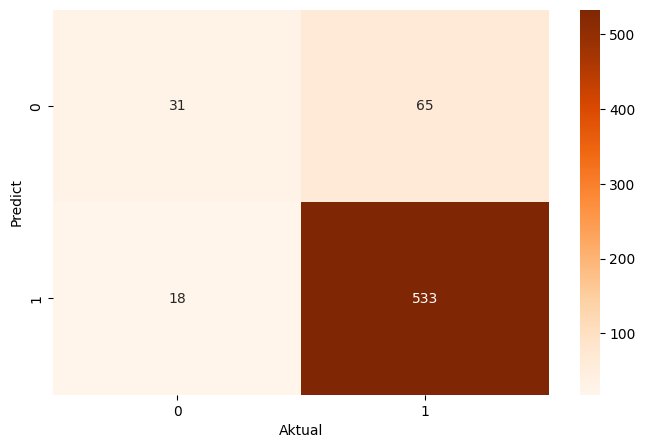

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_knn)
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='.0f', ax=ax, cmap='Oranges')
plt.xlabel('Aktual')
plt.ylabel('Predict')
plt.show()

### KNN dengan GridSearch Cross validation

In [10]:
from sklearn.model_selection import GridSearchCV

# Menentukan model KNN
knn_model = KNeighborsClassifier()

# Menentukan parameter grid yang akan diuji
param_grid = {'n_neighbors': [3, 5, 8, 9, 10], 'weights': ['uniform', 'distance']}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy')

# Melatih model menggunakan GridSearchCV
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan
print("Best Parameters:", grid_search.best_params_)

# Mengevaluasi model terbaik pada data uji
best_model = grid_search.best_estimator_
y_pred_knn = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
print("Best Model Accuracy:", accuracy)

Best Parameters: {'n_neighbors': 8, 'weights': 'uniform'}
Best Model Accuracy: 0.8717156105100463


In [11]:
# Menampilkan hasil pencarian grid untuk Adaboost
grid_results_knn = pd.DataFrame(grid_search.cv_results_)
print(grid_results_knn[['params', 'mean_test_score']])

                                       params  mean_test_score
0    {'n_neighbors': 3, 'weights': 'uniform'}         0.849253
1   {'n_neighbors': 3, 'weights': 'distance'}         0.846552
2    {'n_neighbors': 5, 'weights': 'uniform'}         0.846163
3   {'n_neighbors': 5, 'weights': 'distance'}         0.842302
4    {'n_neighbors': 8, 'weights': 'uniform'}         0.853880
5   {'n_neighbors': 8, 'weights': 'distance'}         0.847318
6    {'n_neighbors': 9, 'weights': 'uniform'}         0.845768
7   {'n_neighbors': 9, 'weights': 'distance'}         0.841905
8   {'n_neighbors': 10, 'weights': 'uniform'}         0.848861
9  {'n_neighbors': 10, 'weights': 'distance'}         0.845000


In [12]:
pd.DataFrame(grid_results_knn)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000000,0.000000,0.025154,0.007488,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.830116,0.857143,0.845560,0.857143,0.837838,0.845560,0.853282,0.848837,0.868217,0.848837,0.849253,0.010122,2
1,0.000000,0.000000,0.015630,0.000005,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.818533,0.853282,0.849421,0.857143,0.830116,0.833977,0.853282,0.848837,0.872093,0.848837,0.846552,0.014447,5
2,0.000000,0.000000,0.028134,0.009377,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.822394,0.849421,0.837838,0.857143,0.837838,0.849421,0.845560,0.848837,0.856589,0.856589,0.846163,0.010346,6
3,0.000000,0.000000,0.017232,0.004678,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.810811,0.845560,0.837838,0.857143,0.826255,0.837838,0.845560,0.848837,0.856589,0.856589,0.842302,0.014077,9
4,0.000000,0.000000,0.028133,0.006250,8,uniform,"{'n_neighbors': 8, 'weights': 'uniform'}",0.830116,0.853282,0.864865,0.868726,0.864865,0.861004,0.845560,0.848837,0.841085,0.860465,0.853880,0.011744,1
5,0.001563,0.004689,0.018756,0.006252,8,distance,"{'n_neighbors': 8, 'weights': 'distance'}",0.822394,0.841699,0.861004,0.872587,0.841699,0.833977,0.845560,0.848837,0.848837,0.856589,0.847318,0.013349,4
6,0.001563,0.004689,0.026622,0.007196,9,uniform,"{'n_neighbors': 9, 'weights': 'uniform'}",0.826255,0.845560,0.845560,0.857143,0.837838,0.853282,0.853282,0.844961,0.852713,0.841085,0.845768,0.008700,7
7,0.000000,0.000000,0.017812,0.004846,9,distance,"{'n_neighbors': 9, 'weights': 'distance'}",0.814672,0.841699,0.845560,0.857143,0.830116,0.841699,0.853282,0.844961,0.848837,0.841085,0.841905,0.011462,10
8,0.001563,0.004688,0.023445,0.007813,10,uniform,"{'n_neighbors': 10, 'weights': 'uniform'}",0.830116,0.837838,0.845560,0.864865,0.845560,0.861004,0.853282,0.848837,0.848837,0.852713,0.848861,0.009657,3
9,0.000000,0.000000,0.021881,0.007654,10,distance,"{'n_neighbors': 10, 'weights': 'distance'}",0.822394,0.841699,0.841699,0.872587,0.830116,0.845560,0.845560,0.852713,0.852713,0.844961,0.845000,0.012787,8


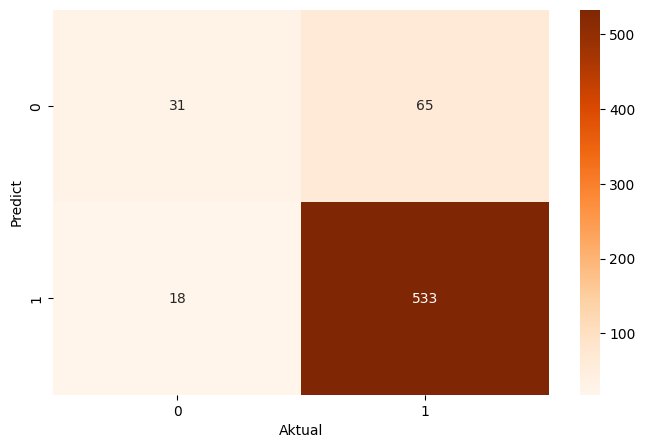

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_knn)
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='.0f', ax=ax, cmap='Oranges')
plt.xlabel('Aktual')
plt.ylabel('Predict')
plt.show()

In [14]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

def preprocess_text(text):
    # Menghapus karakter khusus
    text = re.sub(r'\W', ' ', text)
    
    # Mengubah teks menjadi huruf kecil
    text = text.lower()
    
    # Menghapus kata-kata stop
    stop_words = set(stopwords.words('indonesian'))  # Daftar kata-kata stop Bahasa Indonesia
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    text = ' '.join(filtered_text)
    
    # Menghapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    return text

# Visualisasi Data Sentimen Hasil Kalasifikasi KNN

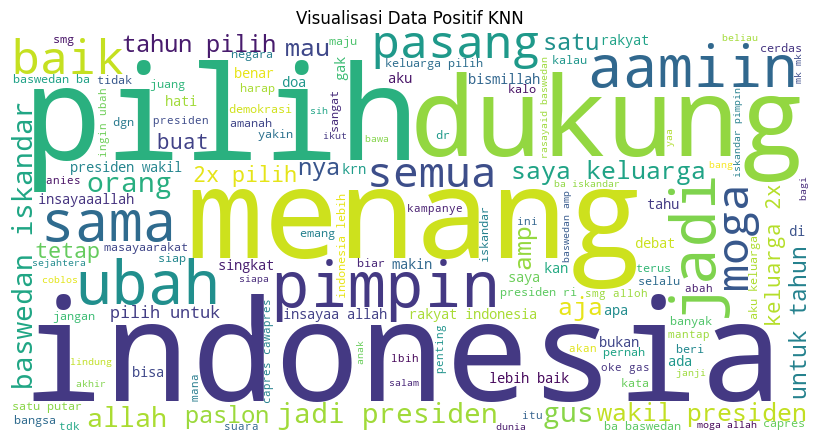

In [15]:
# Visualisasi data Positif KNN

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Mendapatkan indeks dari prediksi positif
positive_indices = [i for i, pred in enumerate(y_pred_knn) if pred == 1]

# Mengumpulkan teks yang terklasifikasi positif
positive_texts = [x.iloc[i] for i in positive_indices]

# Menggabungkan teks-teks tersebut menjadi satu teks
combined_text = ' '.join(positive_texts)

# Membuat WordCloud
wordcloud = WordCloud(width = 800, height = 400, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(combined_text)

# Menampilkan WordCloud
plt.figure(figsize = (8, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title('Visualisasi Data Positif KNN')

plt.show()


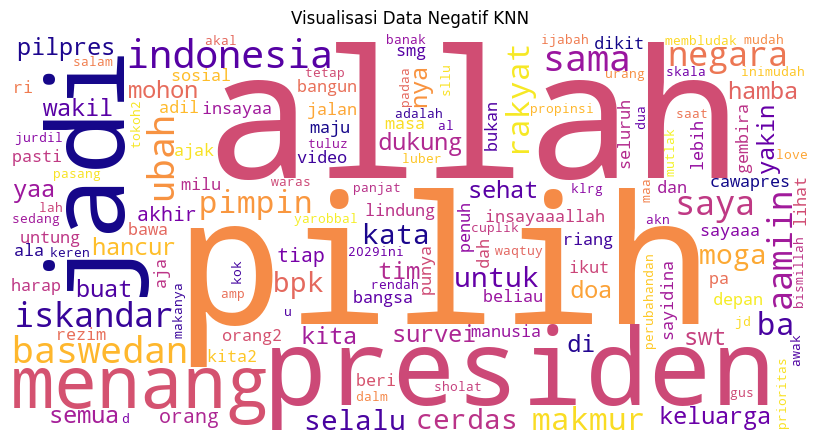

In [16]:
# Visualisasi Data Negatif Klasikasi KNN

# Mendapatkan indeks dari prediksi negatif
negative_indices = [i for i, pred in enumerate(y_pred_knn) if pred == 0]

# Mengumpulkan teks yang terklasifikasi negatif
negative_texts = [x.iloc[i] for i in negative_indices]

# Menggabungkan teks-teks tersebut menjadi satu teks
combined_text_neg = ' '.join(negative_texts)

# Membuat WordCloud
wordcloud_neg = WordCloud(width = 800, height = 400, 
                background_color ='white', 
                colormap='plasma',
                stopwords = None, 
                min_font_size = 10).generate(combined_text_neg)

# Menampilkan WordCloud
plt.figure(figsize = (8, 4), facecolor = None) 
plt.imshow(wordcloud_neg) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title('Visualisasi Data Negatif KNN')

plt.show()


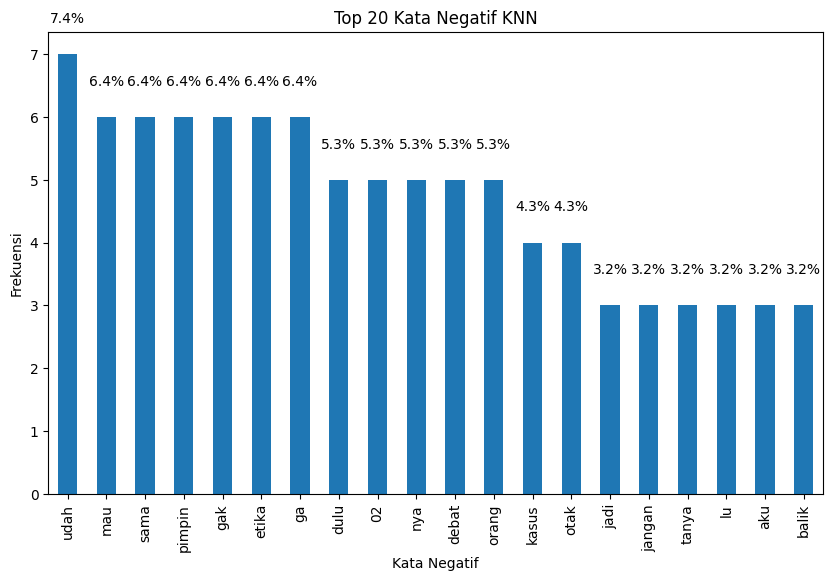

In [17]:
# Mengidentifikasi kata-kata negatif
negatif_words = tfidf_vectorizer.inverse_transform(X_test[y_pred_knn == 0])

# Menghitung frekuensi kemunculan setiap kata negatif
negatif_words_list = [word for sublist in negatif_words for word in sublist]
negatif_word_count = pd.Series(negatif_words_list).value_counts()

# Visualisasi dalam bentuk bar chart
top_n = 20  # Jumlah kata negatif yang ingin divisualisasikan
top_negatif_word_count = negatif_word_count.head(top_n)
plt.figure(figsize=(10,6))
ax = top_negatif_word_count.plot(kind='bar')
plt.title('Top {} Kata Negatif KNN'.format(top_n))
plt.xlabel('Kata Negatif')
plt.ylabel('Frekuensi')

# Menambahkan label persentase di atas setiap bar
totals = sum(top_negatif_word_count)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.5,
            '{:.1%}'.format(i.get_height()/totals), ha='center')

plt.show()

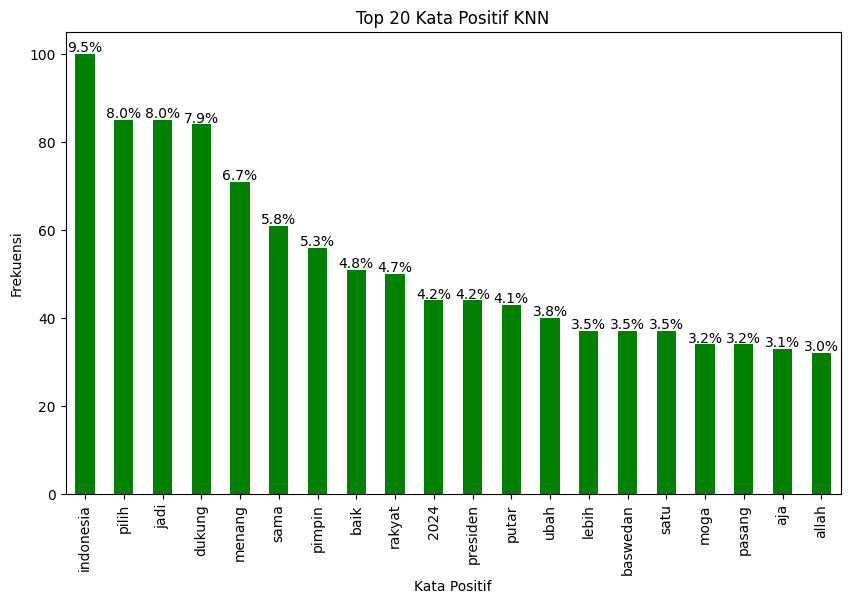

In [18]:
# Mengidentifikasi kata-kata positif
positif_words = tfidf_vectorizer.inverse_transform(X_test[y_pred_knn == 1])

# Menghitung frekuensi kemunculan setiap kata positif
positif_words_list = [word for sublist in positif_words for word in sublist]
positif_word_count = pd.Series(positif_words_list).value_counts()

# Visualisasi dalam bentuk bar chart
top_n = 20  # Jumlah kata positif yang ingin divisualisasikan
top_positif_word_count = positif_word_count.head(top_n)
plt.figure(figsize=(10,6))
ax = top_positif_word_count.plot(kind='bar', color='green')
plt.title('Top {} Kata Positif KNN'.format(top_n))
plt.xlabel('Kata Positif')
plt.ylabel('Frekuensi')

# Menambahkan label persentase di atas setiap bar
totals = sum(top_positif_word_count)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.5,
            '{:.1%}'.format(i.get_height()/totals), ha='center')

plt.show()

In [ ]:
#Testing KNN

# Input teks yang akan diklasifikasikan
input_text = input("Masukkan teks untuk diklasifikasikan: ")

# Ekstraksi fitur dari teks input
input_text_tfidf = tfidf_vectorizer.transform([input_text])

# Melakukan klasifikasi
predicted_sentiment = best_model.predict(input_text_tfidf)

# Menampilkan hasil klasifikasi
if predicted_sentiment[0] == 1:
    sentimen_label = 'positif'
elif predicted_sentiment[0] == 0:
    sentimen_label = 'negatif'
    
print('hasil analisis sentimen untuk teks baru : ',sentimen_label)


# 2. AdaBoost Model

In [11]:
# import librray AdaBoost
from sklearn.ensemble import AdaBoostClassifier
# model AdaBoost
adabost_model = AdaBoostClassifier(n_estimators=50, learning_rate=0.5, random_state=42)

# Latih Model
adabost_model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.5, random_state=42)

In [12]:
y_pred_adaboost = adabost_model.predict(X_test)

In [13]:
# Evaluasi Model AdaBoost
accuracy = accuracy_score(y_test, y_pred_adaboost)
report = classification_report(y_test, y_pred_adaboost, target_names=['negatif','positif'])

print("Accuracy", accuracy)
print("Clasification Report:\n", report)

Accuracy 0.8624420401854714
Clasification Report:
               precision    recall  f1-score   support

     negatif       0.61      0.20      0.30        96
     positif       0.88      0.98      0.92       551

    accuracy                           0.86       647
   macro avg       0.74      0.59      0.61       647
weighted avg       0.84      0.86      0.83       647



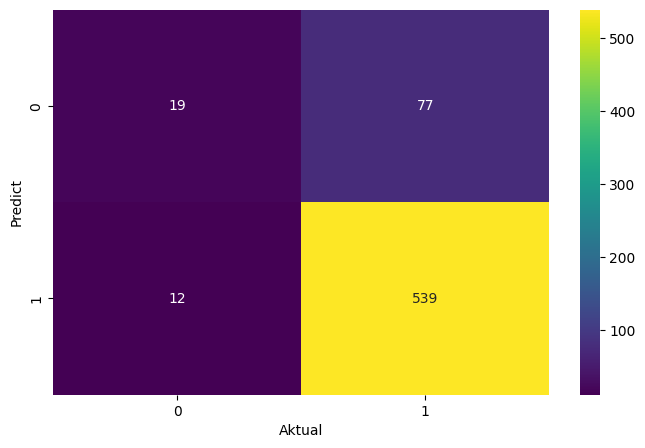

In [14]:
from sklearn.metrics import confusion_matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_adaboost), annot=True, fmt='.0f', ax=ax, cmap='viridis')
plt.xlabel('Aktual')
plt.ylabel('Predict')
plt.show()

### AdaBoost dengan GridSearch Cross validation

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

# Menentukan model Adaboost
adaboost_model = AdaBoostClassifier()

# Menentukan parameter grid yang akan diuji
param_grid_adaboost = {'n_estimators': [10, 30, 50],
                       'learning_rate': [0.1, 0.5, 1.0]}

# Membuat objek GridSearchCV
grid_search_adaboost = GridSearchCV(adaboost_model, param_grid_adaboost, cv=10, scoring='accuracy')

# Melatih model menggunakan GridSearchCV
grid_search_adaboost.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan
print("Best Parameters for Adaboost:", grid_search_adaboost.best_params_)

# Mengevaluasi model terbaik pada data uji
best_model_adaboost = grid_search_adaboost.best_estimator_
y_pred_adaboost = best_model_adaboost.predict(X_test)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("Best Model Accuracy for Adaboost:", accuracy_adaboost)

Best Parameters for Adaboost: {'learning_rate': 0.5, 'n_estimators': 50}
Best Model Accuracy for Adaboost: 0.8624420401854714


In [39]:
# Menampilkan hasil pencarian grid untuk Adaboost
grid_results_adaboost = pd.DataFrame(grid_search_adaboost.cv_results_)
print(grid_results_adaboost[['params', 'mean_test_score']])

                                       params  mean_test_score
0  {'learning_rate': 0.1, 'n_estimators': 10}         0.826442
1  {'learning_rate': 0.1, 'n_estimators': 30}         0.826056
2  {'learning_rate': 0.1, 'n_estimators': 50}         0.826057
3  {'learning_rate': 0.5, 'n_estimators': 10}         0.826443
4  {'learning_rate': 0.5, 'n_estimators': 30}         0.835334
5  {'learning_rate': 0.5, 'n_estimators': 50}         0.835720
6  {'learning_rate': 1.0, 'n_estimators': 10}         0.827991
7  {'learning_rate': 1.0, 'n_estimators': 30}         0.834957
8  {'learning_rate': 1.0, 'n_estimators': 50}         0.834179


In [40]:
pd.DataFrame(grid_results_adaboost)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.254373,0.022939,0.007815,0.007815,0.1,10,"{'learning_rate': 0.1, 'n_estimators': 10}",0.826255,0.826255,0.826255,0.826255,0.826255,0.826255,0.822394,0.833333,0.825581,0.825581,0.826442,0.002561,7
1,0.755566,0.022649,0.003126,0.006251,0.1,30,"{'learning_rate': 0.1, 'n_estimators': 30}",0.826255,0.826255,0.822394,0.826255,0.826255,0.826255,0.822394,0.833333,0.825581,0.825581,0.826056,0.002836,9
2,1.324224,0.069939,0.012394,0.006206,0.1,50,"{'learning_rate': 0.1, 'n_estimators': 50}",0.826255,0.822394,0.822394,0.826255,0.826255,0.826255,0.822394,0.833333,0.829457,0.825581,0.826057,0.003243,8
3,0.276769,0.035622,0.001563,0.004690,0.5,10,"{'learning_rate': 0.5, 'n_estimators': 10}",0.826255,0.822394,0.818533,0.826255,0.826255,0.830116,0.826255,0.833333,0.825581,0.829457,0.826443,0.003872,6
4,0.802364,0.057684,0.012506,0.006253,0.5,30,"{'learning_rate': 0.5, 'n_estimators': 30}",0.830116,0.826255,0.830116,0.849421,0.837838,0.826255,0.837838,0.841085,0.833333,0.841085,0.835334,0.007074,2
5,1.303771,0.061322,0.012555,0.006279,0.5,50,"{'learning_rate': 0.5, 'n_estimators': 50}",0.833977,0.822394,0.818533,0.853282,0.841699,0.833977,0.837838,0.841085,0.837209,0.837209,0.835720,0.009279,1
6,0.289291,0.057796,0.003126,0.006251,1.0,10,"{'learning_rate': 1.0, 'n_estimators': 10}",0.818533,0.810811,0.818533,0.818533,0.833977,0.833977,0.849421,0.813953,0.833333,0.848837,0.827991,0.013246,5
7,0.797461,0.071517,0.006252,0.007657,1.0,30,"{'learning_rate': 1.0, 'n_estimators': 30}",0.830116,0.814672,0.810811,0.849421,0.833977,0.806950,0.864865,0.837209,0.837209,0.864341,0.834957,0.019444,3
8,1.318111,0.051067,0.012503,0.006251,1.0,50,"{'learning_rate': 1.0, 'n_estimators': 50}",0.841699,0.810811,0.814672,0.826255,0.841699,0.814672,0.868726,0.833333,0.829457,0.860465,0.834179,0.018413,4


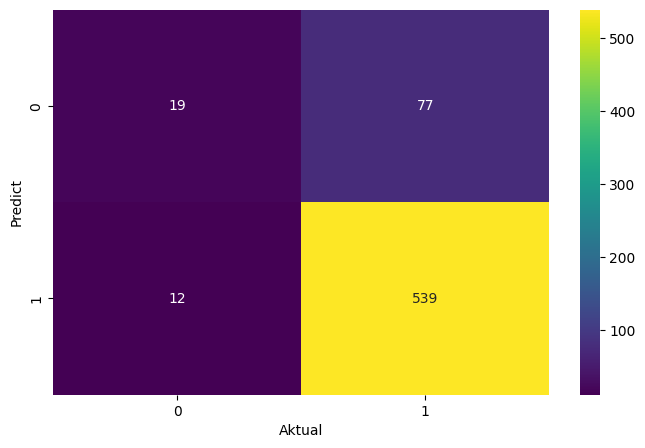

In [41]:
from sklearn.metrics import confusion_matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_adaboost), annot=True, fmt='.0f', ax=ax, cmap='viridis')
plt.xlabel('Aktual')
plt.ylabel('Predict')
plt.show()

# Visualisasi Data Sentimen Hasil Kalasifikasi AdaBoost

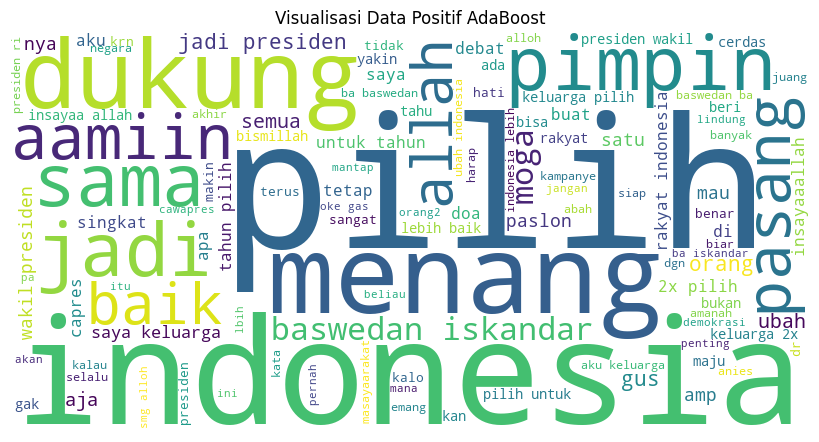

In [36]:
# Visualisasi Data Positif Klasifikasi AdaBoost

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Mendapatkan indeks dari prediksi positif
positive_indices = [i for i, pred in enumerate(y_pred_adaboost) if pred == 1]

# Mengumpulkan teks yang terklasifikasi positif
positive_texts = [x.iloc[i] for i in positive_indices]

# Menggabungkan teks-teks tersebut menjadi satu teks
combined_text = ' '.join(positive_texts)

# Membuat WordCloud
wordcloud = WordCloud(width = 800, height = 400, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(combined_text)

# Menampilkan WordCloud
plt.figure(figsize = (8, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Visualisasi Data Positif AdaBoost')

plt.show()

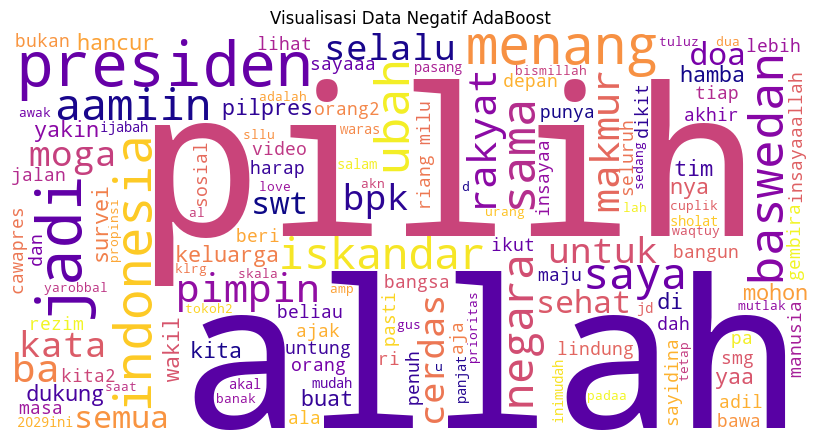

In [37]:
# Visualisasi Data Negatif Klasikasi AdaBoost

# Mendapatkan indeks dari prediksi negatif
negative_indices = [i for i, pred in enumerate(y_pred_knn) if pred == 0]

# Mengumpulkan teks yang terklasifikasi negatif
negative_texts = [x.iloc[i] for i in negative_indices]

# Menggabungkan teks-teks tersebut menjadi satu teks
combined_text_neg = ' '.join(negative_texts)

# Membuat WordCloud
wordcloud_neg = WordCloud(width = 800, height = 400, 
                background_color ='white', 
                colormap='plasma',
                stopwords = None, 
                min_font_size = 10).generate(combined_text_neg)

# Menampilkan WordCloud
plt.figure(figsize = (8, 4), facecolor = None) 
plt.imshow(wordcloud_neg) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Visualisasi Data Negatif AdaBoost')

plt.show()

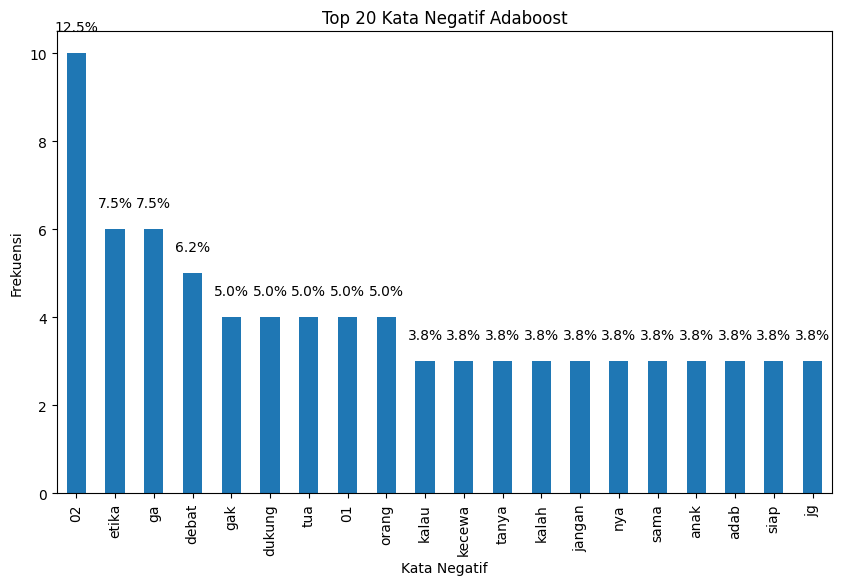

In [38]:
# Mengidentifikasi kata-kata negatif
negatif_words = tfidf_vectorizer.inverse_transform(X_test[y_pred_adaboost == 0])

# Menghitung frekuensi kemunculan setiap kata negatif
negatif_words_list = [word for sublist in negatif_words for word in sublist]
negatif_word_count = pd.Series(negatif_words_list).value_counts()

# Visualisasi dalam bentuk bar chart
top_n = 20  # Jumlah kata negatif yang ingin divisualisasikan
top_negatif_word_count = negatif_word_count.head(top_n)
plt.figure(figsize=(10,6))
ax = top_negatif_word_count.plot(kind='bar')
plt.title('Top {} Kata Negatif Adaboost'.format(top_n))
plt.xlabel('Kata Negatif')
plt.ylabel('Frekuensi')

# Menambahkan label persentase di atas setiap bar
totals = sum(top_negatif_word_count)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.5,
            '{:.1%}'.format(i.get_height()/totals), ha='center')

plt.show()

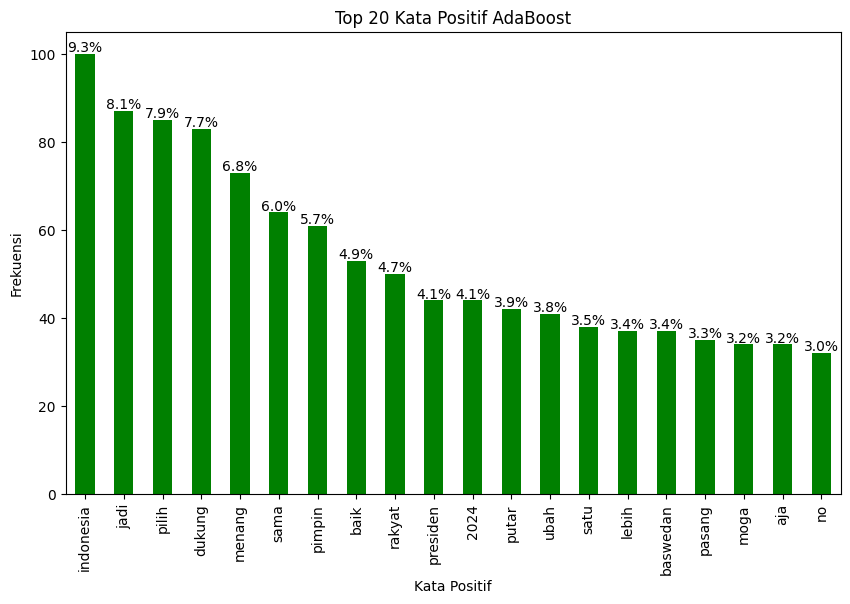

In [39]:
# Mengidentifikasi kata-kata positif
positif_words = tfidf_vectorizer.inverse_transform(X_test[y_pred_adaboost == 1])

# Menghitung frekuensi kemunculan setiap kata positif
positif_words_list = [word for sublist in positif_words for word in sublist]
positif_word_count = pd.Series(positif_words_list).value_counts()

# Visualisasi dalam bentuk bar chart
top_n = 20  # Jumlah kata positif yang ingin divisualisasikan
top_positif_word_count = positif_word_count.head(top_n)
plt.figure(figsize=(10,6))
ax = top_positif_word_count.plot(kind='bar', color='green')
plt.title('Top {} Kata Positif AdaBoost'.format(top_n))
plt.xlabel('Kata Positif')
plt.ylabel('Frekuensi')

# Menambahkan label persentase di atas setiap bar
totals = sum(top_positif_word_count)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.5,
            '{:.1%}'.format(i.get_height()/totals), ha='center')

plt.show()

In [48]:
#Testing AdaBoost

# Input teks yang akan diklasifikasikan
input_text = input("Masukkan teks untuk diklasifikasikan: ")

# Ekstraksi fitur dari teks input
input_text_tfidf = tfidf_vectorizer.transform([input_text])

# Melakukan klasifikasi
predicted_sentiment = best_model_adaboost.predict(input_text_tfidf)

# Menampilkan hasil klasifikasi
if predicted_sentiment[0] == 1:
    sentimen_label = 'positif'
elif predicted_sentiment[0] == 0:
    sentimen_label = 'negatif'
    
print('hasil analisis sentimen untuk teks baru : ', sentimen_label)


Masukkan teks untuk diklasifikasikan: debat kecewa
hasil analisis sentimen untuk teks baru :  negatif
